In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "tt.csv"
df = pd.read_csv(file_path)
df.head()

,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Best Time to visit,Best Time to Visit (Season)
0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,Evening,November - February
1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,Afternoon,November - February
2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,Afternoon,November - February
3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,Evening,November - February
4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,Morning,November - February


In [2]:
df.isnull().sum()

Zone                             0
State                            0
City                             0
Name                             0
Type                             0
Establishment Year               0
time needed to visit in hrs      0
Google review rating             0
Entrance Fee in INR              0
Airport with 50km Radius         0
Weekly Off                     293
Significance                     0
DSLR Allowed                     0
Best Time to visit               0
Best Time to Visit (Season)      0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Zone                         325 non-null    object 
 1   State                        325 non-null    object 
 2   City                         325 non-null    object 
 3   Name                         325 non-null    object 
 4   Type                         325 non-null    object 
 5   Establishment Year           325 non-null    object 
 6   time needed to visit in hrs  325 non-null    float64
 7   Google review rating         325 non-null    float64
 8   Entrance Fee in INR          325 non-null    int64  
 9   Airport with 50km Radius     325 non-null    object 
 10  Weekly Off                   32 non-null     object 
 11  Significance                 325 non-null    object 
 12  DSLR Allowed                 325 non-null    object 
 13  Best Time to visit  

In [4]:
df.describe()

,time needed to visit in hrs,Google review rating,Entrance Fee in INR
count,325.000000,325.000000,325.000000
mean,1.807692,4.486154,115.809231
std,0.971398,0.274580,530.859785
min,0.500000,1.400000,0.000000
25%,1.000000,4.400000,0.000000
50%,1.500000,4.500000,0.000000
75%,2.000000,4.600000,40.000000
max,7.000000,4.900000,7500.000000


In [5]:
#Selecting relevant columns for training
columns = ['Name', 'City', 'Type', 'Significance', 'Best Time to Visit (Season)']
df = df[columns].dropna()

# Encoding categorical variables
encoder_city = LabelEncoder()
encoder_type = LabelEncoder()
encoder_season = LabelEncoder()

df['City'] = encoder_city.fit_transform(df['City'])
df['Type'] = encoder_type.fit_transform(df['Type'])
df['Best Time to Visit (Season)'] = encoder_season.fit_transform(df['Best Time to Visit (Season)'])

Model Accuracy: 0.75


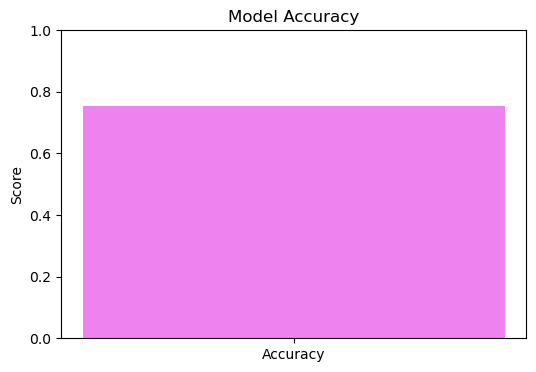

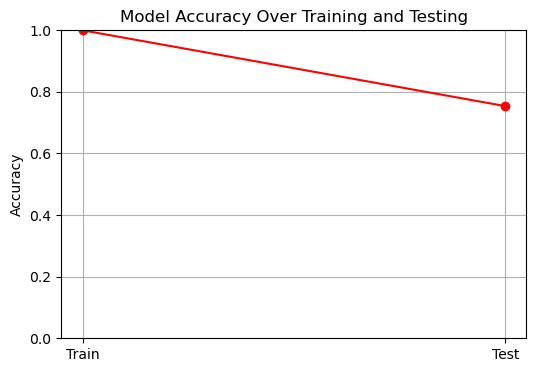

In [6]:
# Splitting data into training and testing sets
X = df[['Type', 'City']]
y = df['Best Time to Visit (Season)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Plot accuracy graph
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color=['violet'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Accuracy')
plt.show()

# Plot accuracy graph (Linear graph)
plt.figure(figsize=(6, 4))
plt.plot(['Train', 'Test'], [1, accuracy], marker='o', linestyle='-', color='red')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Training and Testing')
plt.grid(True)
plt.show()

In [7]:
# Function to recommend places based on city
def recommend_places(city):
    city_encoded = encoder_city.transform([city])[0]
    city_data = df[df['City'] == city_encoded].copy()
    if city_data.empty:
        return "No recommendations available"
    
    city_data.loc[:, 'Type'] = encoder_type.inverse_transform(city_data['Type'].values)
    city_data.loc[:, 'Best Time to Visit (Season)'] = encoder_season.inverse_transform(city_data['Best Time to Visit (Season)'].values)
    
    recommendations = city_data[['Name', 'Type', 'Best Time to Visit (Season)']]
    return tabulate(recommendations, headers=['Place Name', 'Place Description', 'Best Time to Visit (Season)'], tablefmt='grid', showindex=False)

# Example usage
city_input = "Mumbai"
output = recommend_places(city_input)
print(f"Recommended places in {city_input}:")
print(output)

Recommended places in Mumbai:
+------------------------------------------------+---------------------+-------------------------------+
| Place Name                                     | Place Description   | Best Time to Visit (Season)   |
+================================================+=====================+===============================+
| Marine Drive                                   | Promenade           | November - February           |
+------------------------------------------------+---------------------+-------------------------------+
| Gateway of India                               | Monument            | November - February           |
+------------------------------------------------+---------------------+-------------------------------+
| Chhatrapati Shivaji Maharaj Vastu Sangrahalaya | Museum              | November - February           |
+------------------------------------------------+---------------------+-------------------------------+
| Sanjay Gandhi National 

C:\Users\Godlion8123\AppData\Local\Temp\ipykernel_41148\2835712099.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Promenade' 'Monument' 'Museum' 'National Park' 'Temple' 'Temple'
 'Religious Shrine' 'Beach' 'Amusement Park' 'Monument']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  city_data.loc[:, 'Type'] = encoder_type.inverse_transform(city_data['Type'].values)
C:\Users\Godlion8123\AppData\Local\Temp\ipykernel_41148\2835712099.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['November - February' 'November - February' 'November - February'
 'November - February' 'November - February' 'November - February'
 'November - February' 'November - February' 'November - February'
 'November - February']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  city_